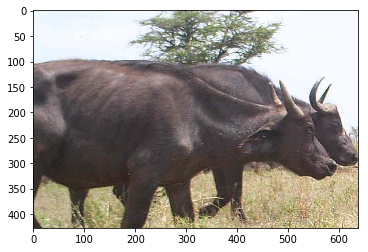

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:\Wildlife Dataset"

CATEGORIES = ["Buffalo", "Cheetah", "Elephant", "GazelleThomsons", "Giraffe", "Hartebeest", 
              "Lionfemale&Cub", "Lionmale", "Ostrich", "SecretaryBird", "Wildebeest", "Zebra"]

for category in CATEGORIES:  
    #print(category)
    path = os.path.join(DATADIR,category)   # create path to the animals folder
    #print(path)
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        #print("Get image in path: " + path)
        #print("Image path: " + img)
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [2]:
print(img_array)

[[[255 251 240]
  [255 251 240]
  [255 251 240]
  ...
  [255 250 247]
  [255 250 247]
  [255 250 247]]

 [[255 251 240]
  [255 251 240]
  [255 251 240]
  ...
  [255 250 247]
  [255 250 247]
  [255 250 247]]

 [[255 251 240]
  [255 251 240]
  [255 251 240]
  ...
  [255 250 247]
  [255 250 247]
  [255 250 247]]

 ...

 [[ 40  48  61]
  [ 40  48  61]
  [ 41  47  58]
  ...
  [185 223 235]
  [172 212 224]
  [152 192 204]]

 [[ 39  47  60]
  [ 39  47  60]
  [ 41  47  58]
  ...
  [200 238 250]
  [180 218 230]
  [152 192 204]]

 [[ 37  46  56]
  [ 38  47  57]
  [ 42  48  59]
  ...
  [212 248 255]
  [176 212 222]
  [138 177 186]]]


In [3]:
print(img_array.shape)

(427, 638, 3)


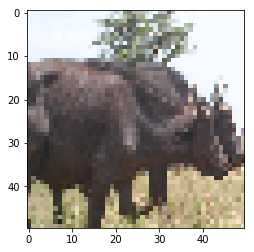

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.imshow(new_array) #not required cmap='gray'
plt.show()

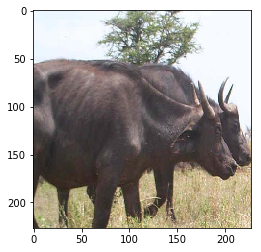

In [6]:
IMG_SIZE = 227

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.imshow(new_array) #not required cmap='gray'
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  
        # get the classification  (0,1,2,3 or 4) 
        #0=buffalo 1=gazelleThomsons, 2=Hartebeest, 3=Wildebeest, 4=Zebra

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
                                            # tqdm creates the percentage bar
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 1363/1363 [00:29<00:00, 46.34it/s]


14283


In [8]:
import random

random.shuffle(training_data)

In [9]:
training_data[499][0] # Image array final sample
#training_data[24945][1] # Classification

array([[[255, 226, 199],
        [255, 226, 199],
        [254, 225, 198],
        ...,
        [255, 221, 197],
        [255, 221, 197],
        [255, 223, 194]],

       [[255, 226, 199],
        [255, 226, 199],
        [255, 227, 200],
        ...,
        [255, 221, 197],
        [255, 221, 197],
        [255, 222, 196]],

       [[255, 226, 199],
        [255, 226, 199],
        [255, 226, 199],
        ...,
        [255, 221, 197],
        [255, 221, 197],
        [255, 221, 197]],

       ...,

       [[ 64,  72,  74],
        [134, 152, 167],
        [154, 173, 196],
        ...,
        [ 88, 102, 126],
        [112, 134, 151],
        [ 79,  93, 100]],

       [[ 55,  70,  71],
        [ 93, 106, 115],
        [137, 161, 187],
        ...,
        [ 79, 101, 119],
        [ 73,  90, 100],
        [ 88, 108, 112]],

       [[148, 165, 176],
        [ 77,  83,  98],
        [ 99, 115, 143],
        ...,
        [117, 132, 147],
        [ 56,  76,  79],
        [100, 123, 130]]

In [10]:
for sample in training_data[:10]:
    print(sample[1])

11
3
6
5
11
9
1
7
2
1


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(X[0])
print(X.shape)

[[[254 212 159]
  [255 213 160]
  [254 212 159]
  ...
  [255 215 146]
  [255 215 146]
  [255 217 143]]

 [[255 213 160]
  [254 212 159]
  [254 212 159]
  ...
  [255 216 147]
  [255 215 146]
  [255 219 145]]

 [[254 214 161]
  [254 214 161]
  [252 212 159]
  ...
  [252 217 143]
  [252 217 144]
  [253 219 143]]

 ...

 [[220 220 220]
  [220 220 220]
  [220 220 220]
  ...
  [220 220 220]
  [  6   6   6]
  [ 16  16  16]]

 [[220 220 220]
  [220 220 220]
  [220 220 220]
  ...
  [220 220 220]
  [ 11  11  11]
  [219 219 219]]

 [[220 220 220]
  [220 220 220]
  [220 220 220]
  ...
  [220 220 220]
  [220 220 220]
  [221 221 221]]]
(14283, 227, 227, 3)


In [12]:
y = np.array(y)
y = y.reshape((14283,1))
y.shape
print(y)

[[11]
 [ 3]
 [ 6]
 ...
 [ 0]
 [ 0]
 [ 7]]


In [13]:
from numpy import array  #unneccessary as aldy imported above
from numpy import argmax
from keras.utils import to_categorical


Using TensorFlow backend.


In [14]:
y_encoded = to_categorical(y)
print(y_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
print(y_encoded.shape)

(14283, 12)


In [16]:
import pickle

pickle_out = open("X_12classes227.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_12classes227.pickle","wb")
pickle.dump(y_encoded, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X_12classes227.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_12classes227.pickle","rb")
y = pickle.load(pickle_in)

In [18]:
X.shape

(14283, 227, 227, 3)

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y.shape

(14283, 12)